## Time Series Analysis

### 1- Introduction
A time series is a series of data points indexed in time order. The sequence of data points taken at successive equally spaced points in time. Examples of time series are daily closing value of the Dow Jones Industrial Average or number of sales of shampoo over a 3 year period.

Time series are very frequently in statistics, signal processing, pattern recognition, mathematical finance, control engineering, astronomy, communications engineering, and largely in any domain of applied science and engineering which involves temporal measurements.

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Methods for time series analysis may be divided into several category including frequency-domain methods or time-domain methods. In this project, we're going to focus on time-domain methods which are widely used to predict future values based on previously observed values.

We will use Pandas and the Statsmodels library wich are powerful Python tool to process time series data.

### 2- Time series Features
In time-domain analysis, each time series is characterised by the features bellow:
- Level: is the average value in the series.
- Trend: is the increasing or decreasing value in the series.
- Seasonality: is the repeating the short-term cycle in the series.
- Noise: is the random variation in the series.

### 3- Analysis method

There are basically two methods to analyze the seasonality of a Time Series: additive or multiplicative.

__Additive__
Additive method fit for model of data in which the effects of the individual factors are differentiated and added to model the data. It can be represented by:  

__y(t) = Level + Trend + Seasonality + Noise__  

The behavior is linear where changes over time are consistently made by the same amount, like a linear trend. In this situation, the linear seasonality has the same amplitude.


__Multiplicative__

In this situation, trend and seasonal components are multiplied and then added to the error component. It is not linear, can be exponential or quadratic and represented by a curved line as below:  

__y(t) = Level * Trend * Seasonality * Noise__   

The difference from the additive model and the multiplicative model has an increasing or decreasing amplitude over time. Multiplicative models is used when the magnitude of the seasonal pattern in the data depends on the magnitude of the data. On other hand, in the additive model, the magnitude of seasonality does not change in relation to time.

<img src="img/add_mul.jpeg">

Left series fit to additive model while right model fit with multiplicative model.

### 4- Decomposition

Statmodels provide tool to decompose serie in order to choose the best model to model it. Here is some examples.

In [3]:
# import package
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
import statsmodels.api as sm

//anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [4]:
# Load dataset
dataset = pd.read_csv("../Data/AirPassengers.csv", sep=',')
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
dataset[dataset.isnull().any(axis=1)]

,Month,#Passengers


In [6]:
dataset.reset_index(inplace=True)
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset = dataset.set_index('Month')
dataset.head()

,index,#Passengers
Month,,
1949-01-01,0,112
1949-02-01,1,118
1949-03-01,2,132
1949-04-01,3,129
1949-05-01,4,121


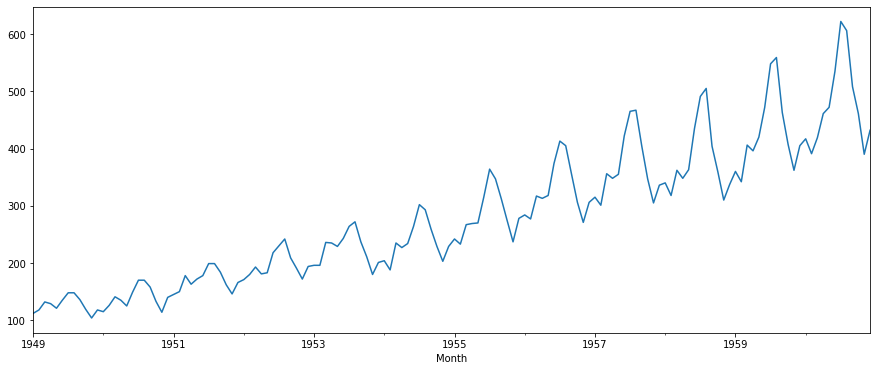

In [7]:
dataset['#Passengers'].plot(figsize=(15, 6))
plt.show()

In [8]:
dataset.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

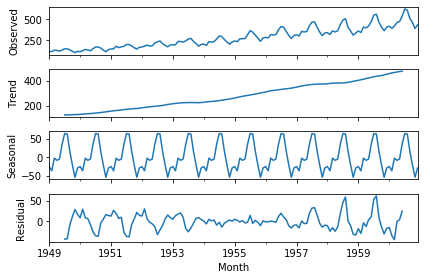

In [9]:
y = dataset['#Passengers']
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

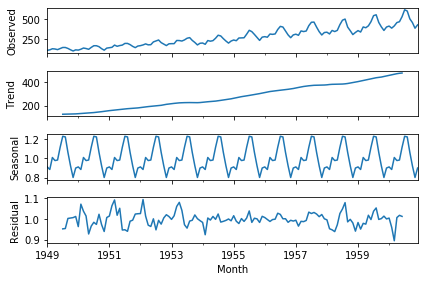

In [10]:
y = dataset['#Passengers']
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

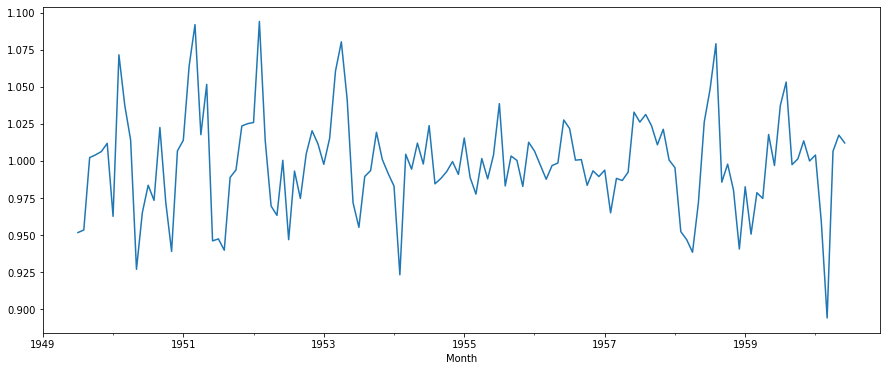

In [11]:
decomposition.resid.plot(figsize=(15, 6))

In [12]:
decomposition.resid[:10]

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
Name: #Passengers, dtype: float64

In [10]:
decomposition.seasonal[:10]

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
Name: #Passengers, dtype: float64

In [11]:
decomposition.trend[:10]

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Name: #Passengers, dtype: float64

In [12]:
decomposition.observed[:10]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

Before choosing between Additive or Multiplicative models, take a good look at the behavior of decomposition charts.

### 5- Forecasting with ARIMA model

ARIMA (Autoregressive Integrated Moving Average) models are the most commonly used method for time-series forecasting.
ARIMA models are denoted with the notation ARIMA(p, d, q) where:
- p is the number of autoregressive terms,
- d is the number of nonseasonal differences needed for stationarity, and
- q is the number of lagged forecast errors in the prediction equation.

Since our dataset contains observation over several years, we can analyse seasonality over year and extract trend.

In [13]:
# define ARIMA parameter
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
# make grid search to find best ARIMA p, d, q parameters
y = dataset['#Passengers']

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2044.4329486427587


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1887.302363683753
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1315.9211929474204
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1156.2914901508545
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1118.6259190717344
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1107.2562043235773
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1109.2437994445115
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1033.6172166729878


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1846.078937757151
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1567.9916312320859


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1196.9983614399773
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1072.1382984044353


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1071.002681075534


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1049.5801419365823
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1059.5112223290446


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:985.3346478032538
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1405.000661294967
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1194.7130010979688
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1024.481642983479
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:937.7995265380559
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1031.4838983661916


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7

ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1015.0000347579858
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:944.487630115843
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:939.7984372654328


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1379.4417180072928
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1181.6309458759206
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1006.7919047398804


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:920.6308317604711
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1014.223903182528


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:985.1362335027393
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:934.7975425749107


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:920.3192974988934
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1415.9068815931882
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1205.3907786172608
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1029.977309170107


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:944.3854921533092
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1017.3155493517834


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1007.0272556862756
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:944.0441660828052


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:945.4400866875516
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1390.45150184149


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1192.2949631619504
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1014.2547824626319


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:929.4329707892156
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1009.5891017292654


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:989.1764737572653
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:935.81633482176


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:935.9152860561383
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1392.9437938537153
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1190.5342929076355
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1013.3680449838097


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:928.1312837305526
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1007.6496486407211


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:995.4636249453285
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:927.5904374710257


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:928.1418620185409
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1377.2926858930791


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1185.3340359694066
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1008.5528813489258
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:922.4148960116155


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1009.1896100684427


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:987.1339264658632
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:929.5756208330858


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:922.2053774352132


The above output suggests that __SARIMA(1, 1, 0)x(0, 1, 1, 12)__ yields the lowest AIC value. Therefore we should consider this to be optimal option.

### 6- Fitting the ARIMA model

In [15]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3112      0.085     -3.649      0.000      -0.478      -0.144
ma.S.L12      -0.1053      0.099     -1.065      0.287      -0.299       0.088
sigma2       145.0076     17.398      8.335      0.000     110.908     179.107


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


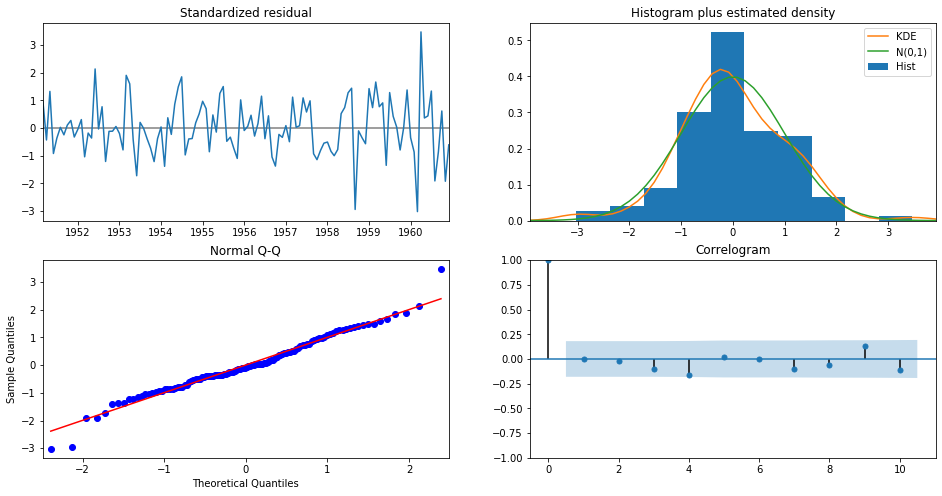

In [19]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

We can see that model diagnostics suggests that the model residuals are closly normally distributed. It mean that our model is well fitted.

### 7- Validating forecasts
To help us understand the accuracy of our forecasts, we compare predicted values to real values of the time series, and we set forecasts to start at 1959-01 to 1960-12 of the data.

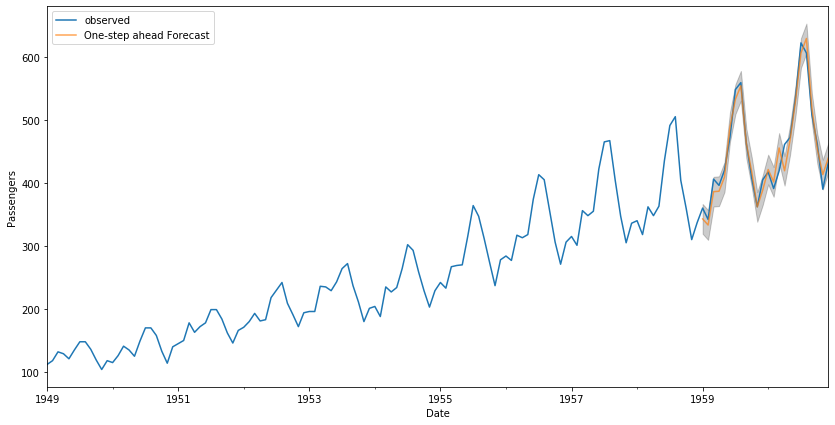

In [20]:
pred = results.get_prediction(start=pd.to_datetime('1959-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1949-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [21]:
y_forecasted = pred.predicted_mean
y_truth = y['1959-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 16.65
